## Data Load

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
train = pd.read_csv("../data/train.csv", index_col="PassengerId")
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Survival

In [22]:
survived_rate = train["Survived"].mean()
survived_rate = survived_rate * 100

print(f"생존률 = {survived_rate:.1f}%")

생존률 = 38.4%


In [23]:
train.loc[train["Survived"] == 0, "Survived_h"] = "Perish"
train.loc[train["Survived"] == 1, "Survived_h"] = "Survived"

print(train.shape)
print(train["Survived_h"].value_counts())
train[["Survived", "Survived_h"]].head()

(891, 12)
Perish      549
Survived    342
Name: Survived_h, dtype: int64


,Survived,Survived_h
PassengerId,,
1,0,Perish
2,1,Survived
3,1,Survived
4,1,Survived
5,0,Perish


## 2. Pclass

Pclass 별 생존률에 대한 피벗테이블

In [24]:
pd.pivot_table(data=train, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [25]:
train["Pclass_h"] = train["Pclass"].replace(1,"First Class")
train.loc[train["Pclass"] == 2, "Pclass_h"] = "Business"
train.loc[train["Pclass"] == 3, "Pclass_h"] = "Economy"
train[["Pclass", "Pclass_h"]].head()

,Pclass,Pclass_h
PassengerId,,
1,3,Economy
2,1,First Class
3,3,Economy
4,1,First Class
5,3,Economy


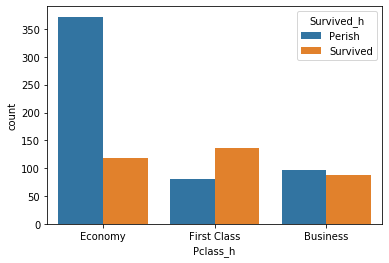

In [26]:
sns.countplot(data=train, x="Pclass_h", hue="Survived_h")

## 3. Embarked

In [27]:
pd.pivot_table(data=train, index="Embarked", values="Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [28]:
train.loc[train["Embarked"] == "S", "Embarked_h"] = "Southampton"
train.loc[train["Embarked"] == "C", "Embarked_h"] = "Cherbourg"
train.loc[train["Embarked"] == "Q", "Embarked_h"] = "Queenstown"
train[["Embarked", "Embarked_h"]].head()

,Embarked,Embarked_h
PassengerId,,
1,S,Southampton
2,C,Cherbourg
3,S,Southampton
4,S,Southampton
5,S,Southampton


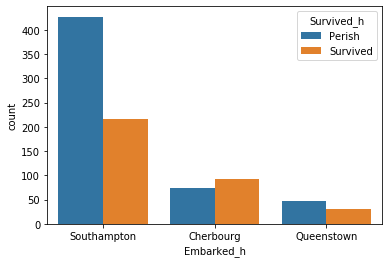

In [29]:
sns.countplot(data=train, x="Embarked_h", hue="Survived_h")

## 4. Age

In [31]:
print(f"평균(mean): {train['Age'].mean():.1f}세")
print(f"최고 나이: {train['Age'].min():.1f}세")
print(f"최저 나이: {train['Age'].max():.1f}세")

평균(mean): 29.7세
최고 나이: 0.4세
최저 나이: 80.0세


Pclass 별 평균 나이

In [32]:
pd.pivot_table(data=train, index="Pclass", values="Age", aggfunc="mean")

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


연령대를 3개 구역으로 구분

In [41]:
train.loc[train["Age"] < 15, "AgeType"] = "Young"
train.loc[(15 <= train["Age"]) & (train["Age"] < 30), "AgeType"] = "Medium"
train.loc[train["Age"] >= 30, "AgeType"] = "Old"
train[["Age", "AgeType"]].head(10)

,Age,AgeType
PassengerId,,
1,22.0,Medium
2,38.0,Old
3,26.0,Medium
4,35.0,Old
5,35.0,Old
6,NaN,NaN
7,54.0,Old
8,2.0,Young
9,27.0,Medium


연령대 구역 별 평균 생존률

In [37]:
pd.pivot_table(data=train, index="AgeType", values="Age", aggfunc="mean")

,Age
AgeType,
Medium,22.576797
Old,41.948485
Young,5.816282


구역별 생존자와 사망자의 차이

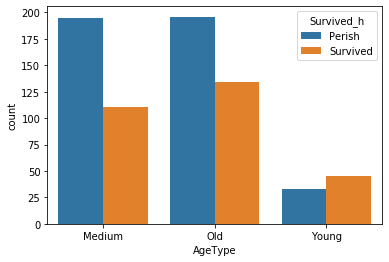

In [39]:
sns.countplot(data=train, x="AgeType", hue="Survived_h")

구역별 평균 나이

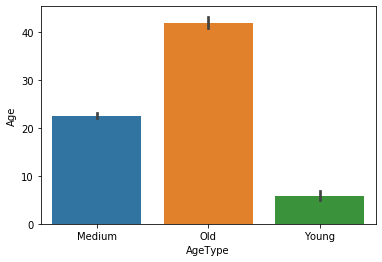

In [40]:
sns.barplot(data=train, x="AgeType", y="Age")

나이가 알려진 승객과 나이가 기록되지 않는 승객의 생존여부 차이

In [42]:
train.loc[train["Age"].isna(), "AgeBlank"] = "Blank"
train.loc[train["AgeBlank"].isna(), "AgeBlank"] = "Not Blank"

blank = train.loc[train["AgeBlank"]=="Blank", "Survived"]
nblank = train.loc[train["AgeBlank"]=="Not Blank", "Survived"]

print(f"나이가 알려진 승객의 생존률: {blank.mean()*100:.2f}%")
print(f"나이가 알려지지 않은 승객의 생존률: {nblank.mean()*100:.2f}%")

나이가 알려진 승객의 생존률: 29.38%
나이가 알려지지 않은 승객의 생존률: 40.62%


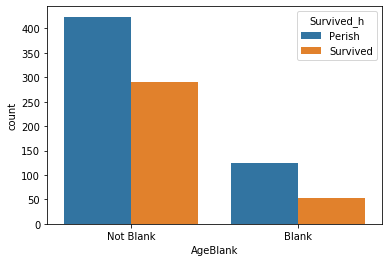

In [44]:
sns.countplot(data=train, x="AgeBlank", hue="Survived_h")

## 5. SibSp & Parch

### Single

1. ``SibSp``: 형재, 자매, 배우자의 수
2. ``Parch``: 부모의 수

In [45]:
ssingle = train["SibSp"] == 0
psingle = train["Parch"] == 0
train["Single"] = False
train.loc[ssingle & psingle, "Single"] = True

train[["SibSp", "Parch", "Single"]].head()

,SibSp,Parch,Single
PassengerId,,,
1,1,0,False
2,1,0,False
3,0,0,True
4,1,0,False
5,0,0,True


싱글 승객의 생존률

In [46]:
pd.pivot_table(data=train, index="Single", values="Survived", aggfunc="mean")

,Survived
Single,
False,0.505650
True,0.303538


### Family Size

``SibSp``와 ``Parch``를 합한 가족 수 ``FamilySize`` 컬럼 생성

In [49]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
train[["SibSp", "Parch", "FamilySize"]].head()

,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


In [50]:
pd.pivot_table(train, "Survived", "FamilySize", aggfunc="mean")

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


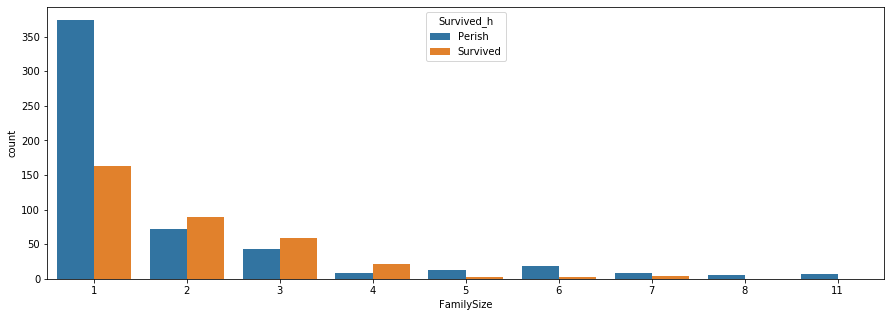

In [64]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x="FamilySize", hue="Survived_h")

In [57]:
train.loc[train["FamilySize"] == 1, "FamilyType"] = "Single"
train.loc[train["FamilySize"] >= 2, "FamilyType"] = "Nuclear"
train.loc[train["FamilySize"] >= 5, "FamilyType"] = "Big"
train[["FamilySize", "FamilyType"]].head(10)

,FamilySize,FamilyType
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single
6,1,Single
7,1,Single
8,5,Big
9,3,Nuclear


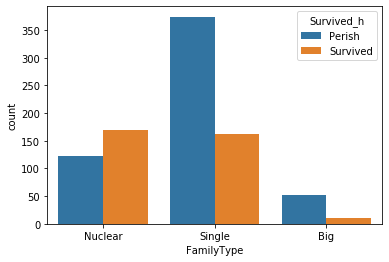

In [58]:
sns.countplot(data=train, x="FamilyType", hue="Survived_h")